# Exploracion de datos

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data frame

In [89]:
data = pd.read_csv('data_limpieza.csv')

In [90]:
data.head()
print(data)

        PERIODO COLE_AREA_UBICACION COLE_BILINGUE COLE_CALENDARIO  \
0         20192              URBANO             N               A   
1         20192              URBANO             N               A   
2         20192               RURAL             N               A   
3         20192               RURAL             N               A   
4         20192              URBANO             N               A   
...         ...                 ...           ...             ...   
119231    20221              URBANO             N               A   
119232    20221              URBANO             N               A   
119233    20221              URBANO             N               A   
119234    20221              URBANO             N               A   
119235    20221              URBANO             S               B   

            COLE_CARACTER COLE_DEPTO_UBICACION COLE_GENERO COLE_JORNADA  \
0       TÉCNICO/ACADÉMICO            SANTANDER       MIXTO       MAÑANA   
1       TÉCNICO/ACADÉ

## Exploracion

<Axes: >

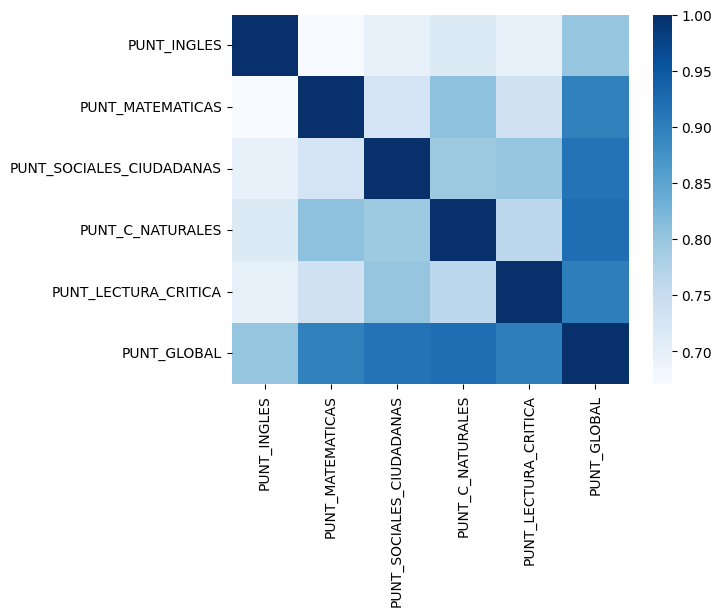

In [99]:
features=['PUNT_INGLES','PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA','PUNT_GLOBAL']
data_filtered=data[features]
corr = data_filtered.corr()
sns.heatmap(corr, cmap="Blues", annot=False)

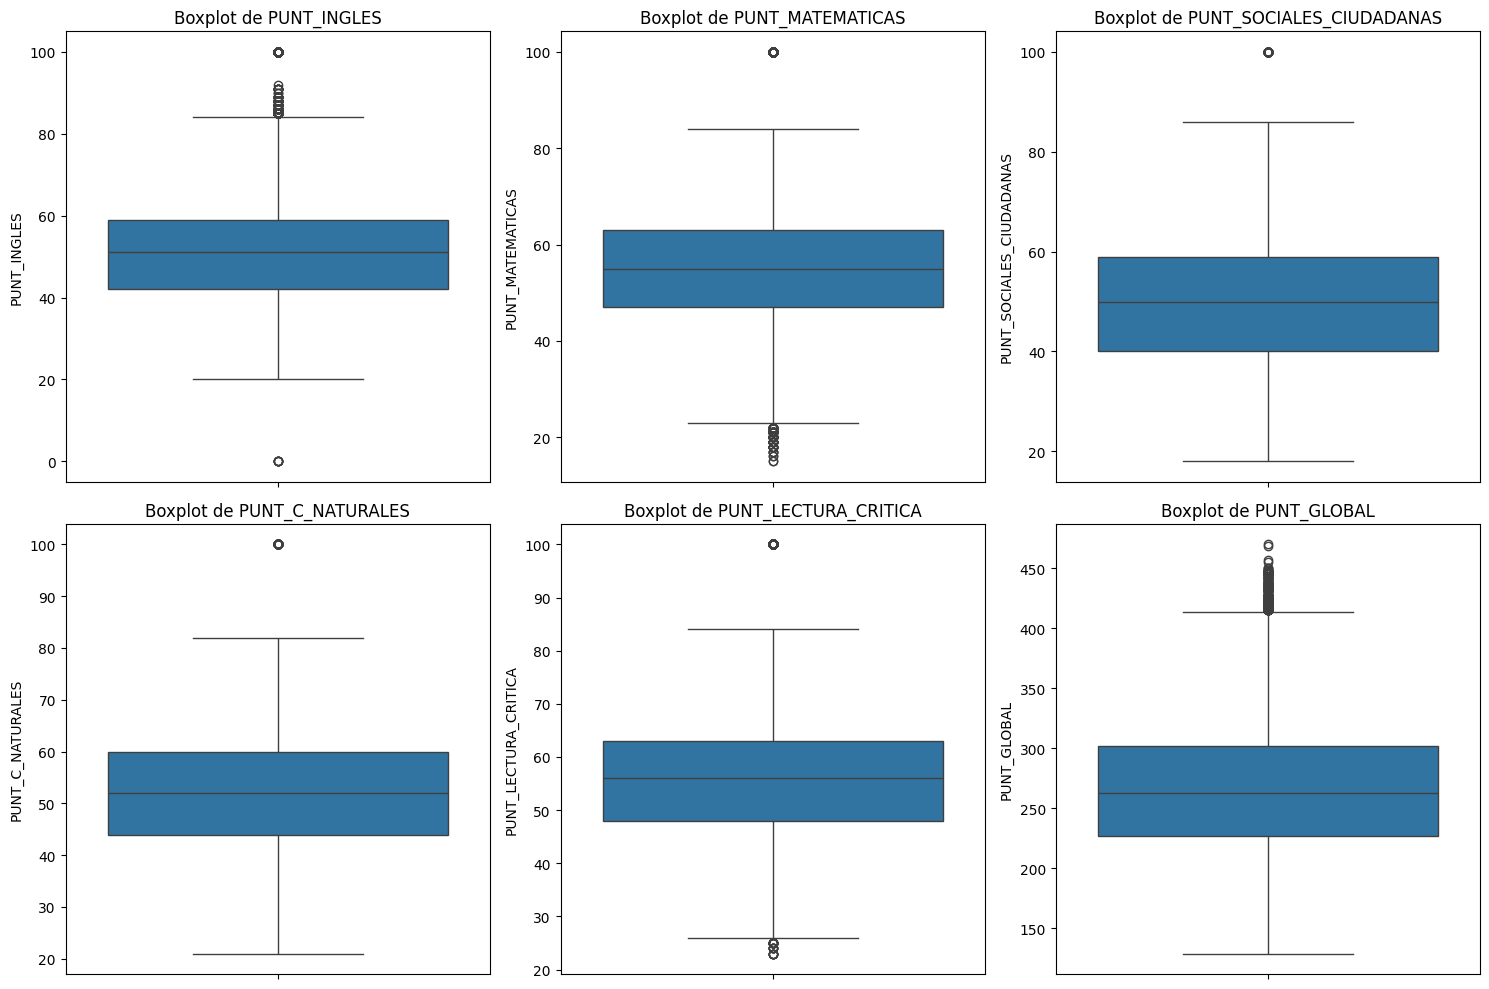

In [105]:
import matplotlib.pyplot as plt

# Definir las variables de entrada (todas except la variable objetivo)
variables_entrada = data[features]

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear un boxplot para cada variable de entrada
num_subplots = min(len(variables_entrada.columns), 30)
for i, columna in enumerate(variables_entrada.columns[:num_subplots]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=columna, data=data)
    plt.title(f'Boxplot de {columna}')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los boxplots
plt.show()

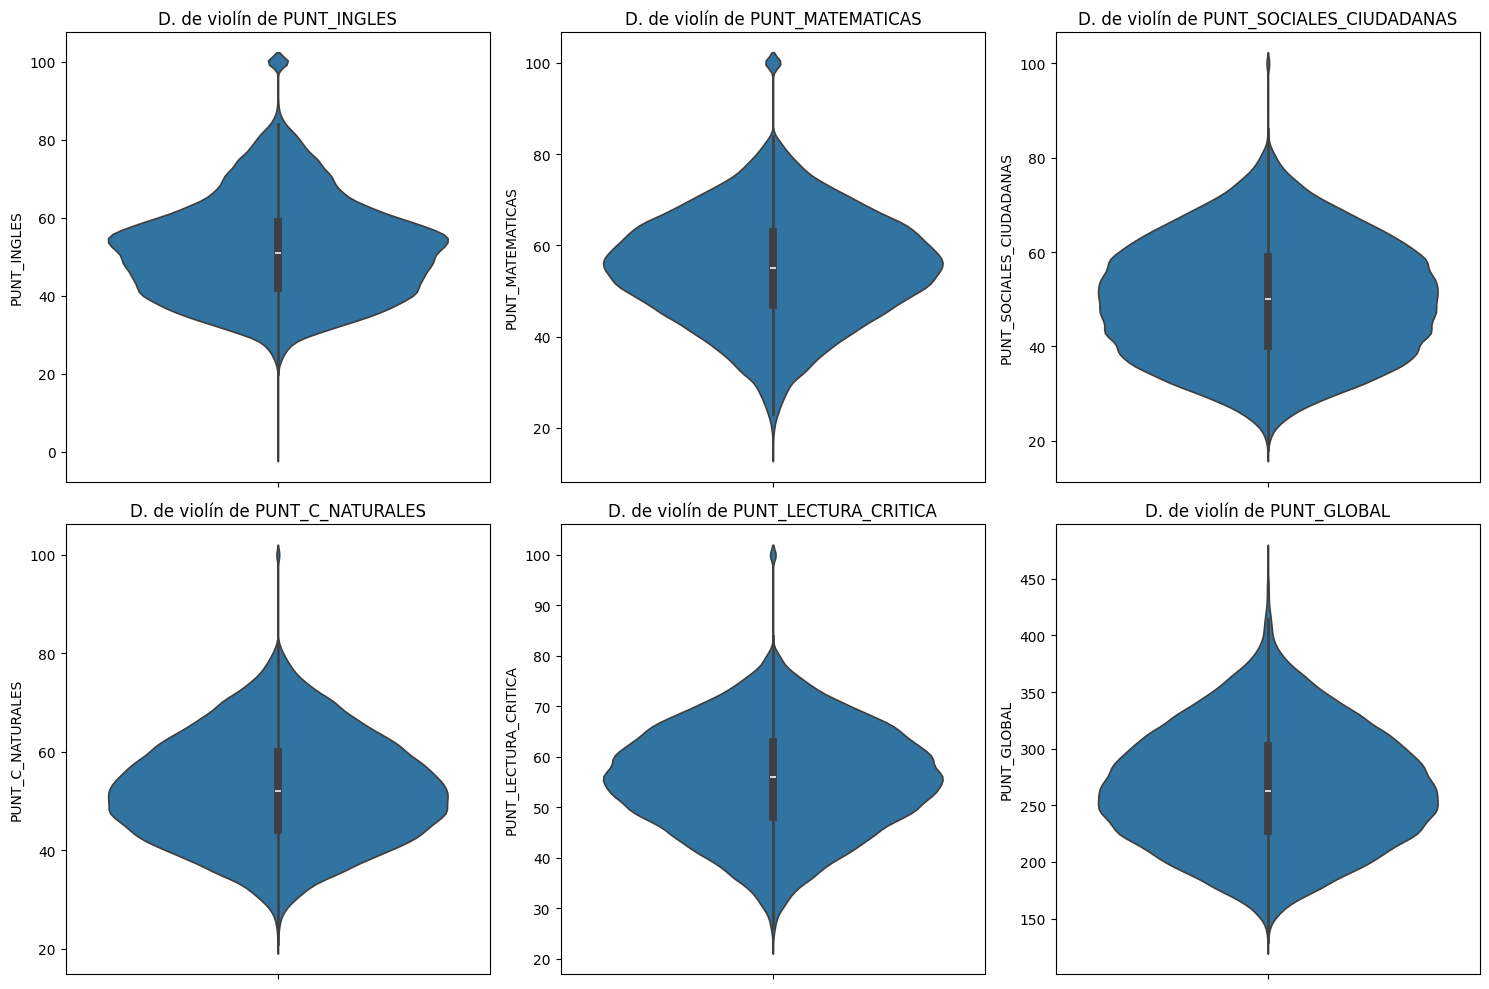

In [107]:
plt.figure(figsize=(15, 10))

# Crear un diagrama de violín para cada variable de entrada
num_subplots = min(len(variables_entrada.columns), 30)
for i, columna in enumerate(variables_entrada.columns[:num_subplots]):
    plt.subplot(2, 3, i+1)
    sns.violinplot(y=columna, data=data)
    plt.title(f'D. de violín de {columna}')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los diagramas de violín
plt.show()

## Descriptivas

In [86]:
descripcion = data.describe()
print(descripcion)


             PERIODO    PUNT_INGLES  PUNT_MATEMATICAS  \
count  119236.000000  119235.000000     119236.000000   
mean    20206.618957      51.897371         55.137609   
std        14.974185      12.731581         11.894041   
min     20191.000000       0.000000         15.000000   
25%     20192.000000      42.000000         47.000000   
50%     20192.000000      51.000000         55.000000   
75%     20222.000000      59.000000         63.000000   
max     20222.000000     100.000000        100.000000   

       PUNT_SOCIALES_CIUDADANAS  PUNT_C_NATURALES  PUNT_LECTURA_CRITICA  \
count             119236.000000     119236.000000         119236.000000   
mean                  50.032968         52.245689             55.432118   
std                   12.291970         10.644548             10.431099   
min                   18.000000         21.000000             23.000000   
25%                   40.000000         44.000000             48.000000   
50%                   50.000000     

## Graficas de interes

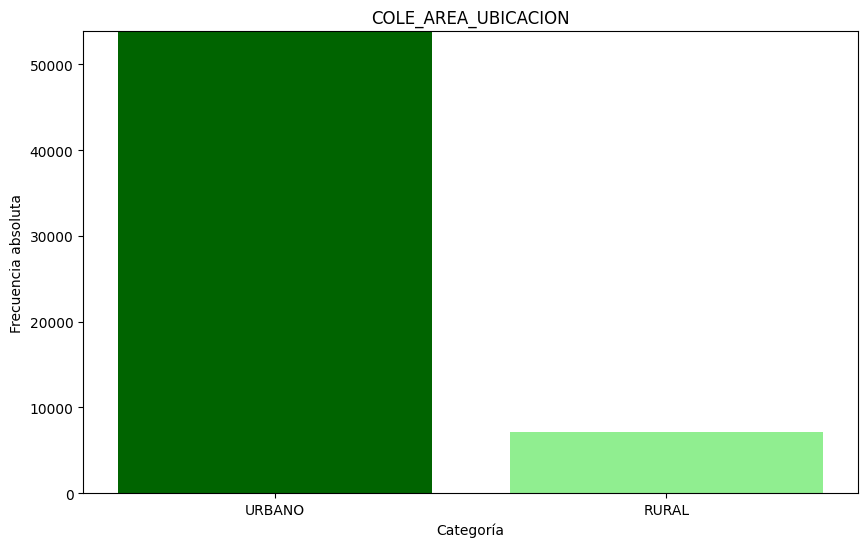

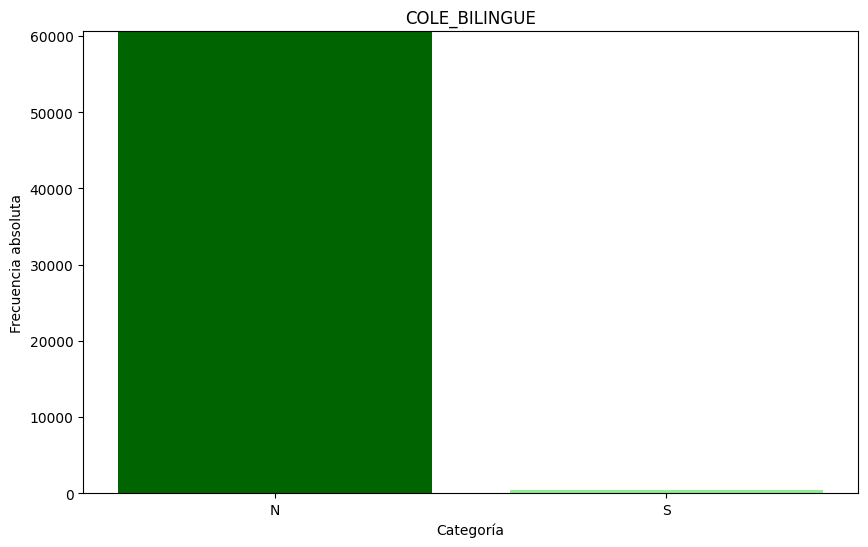

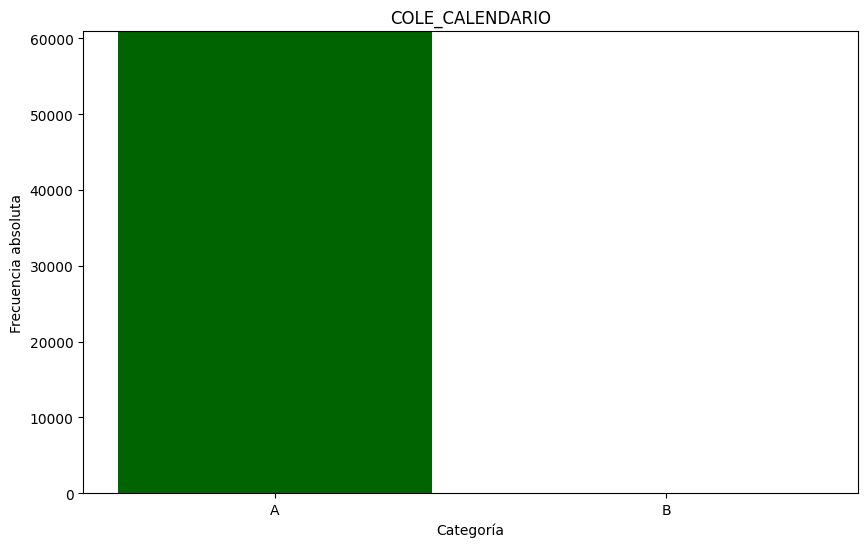

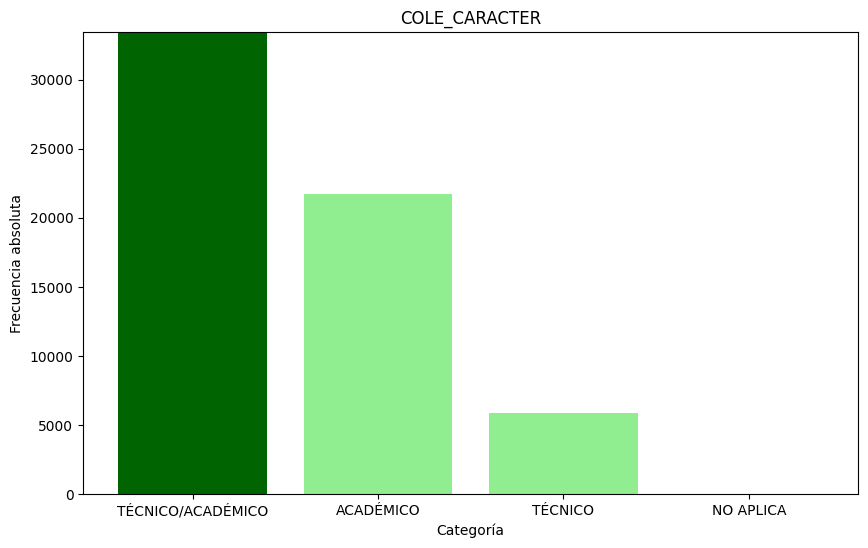

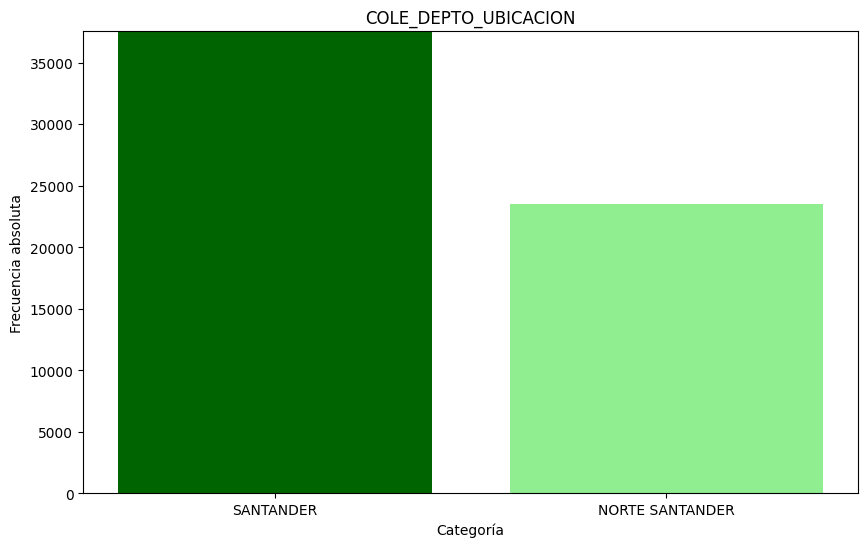

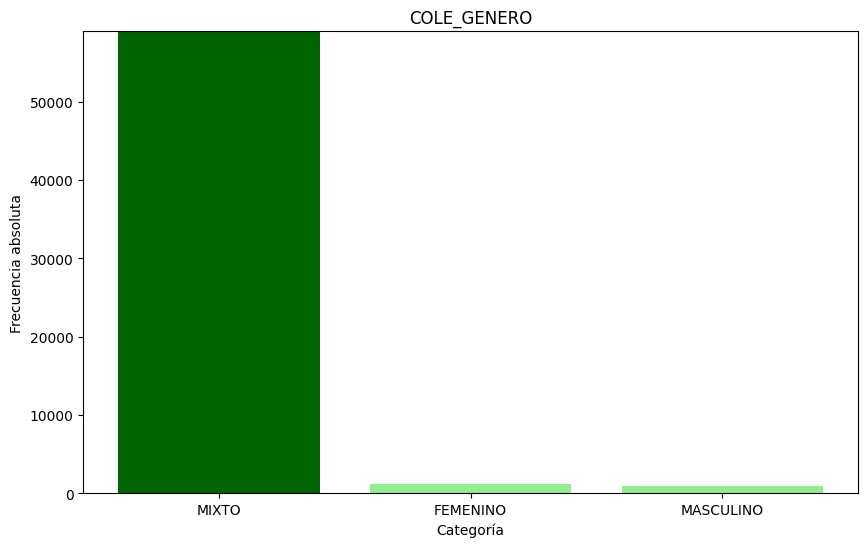

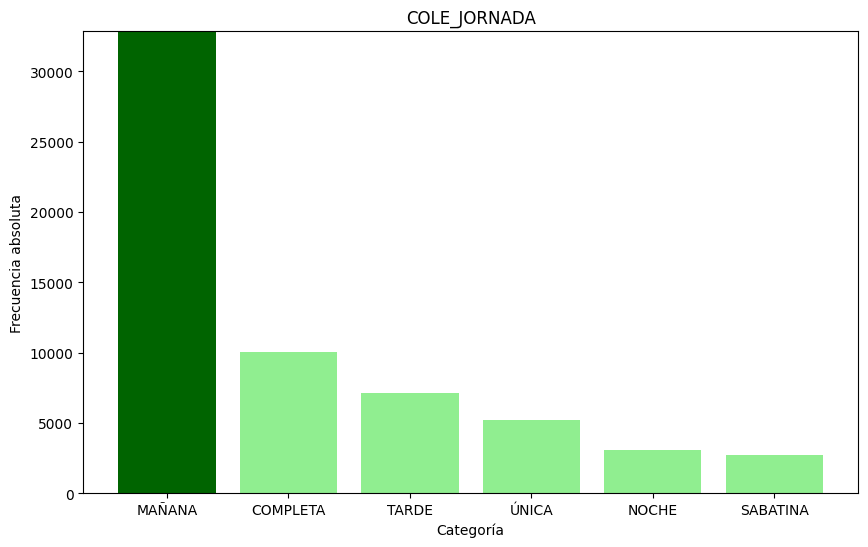

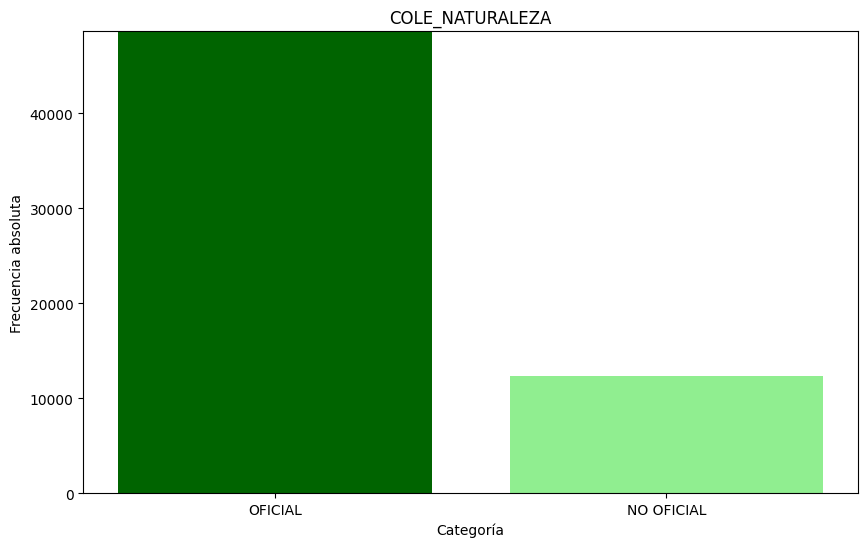

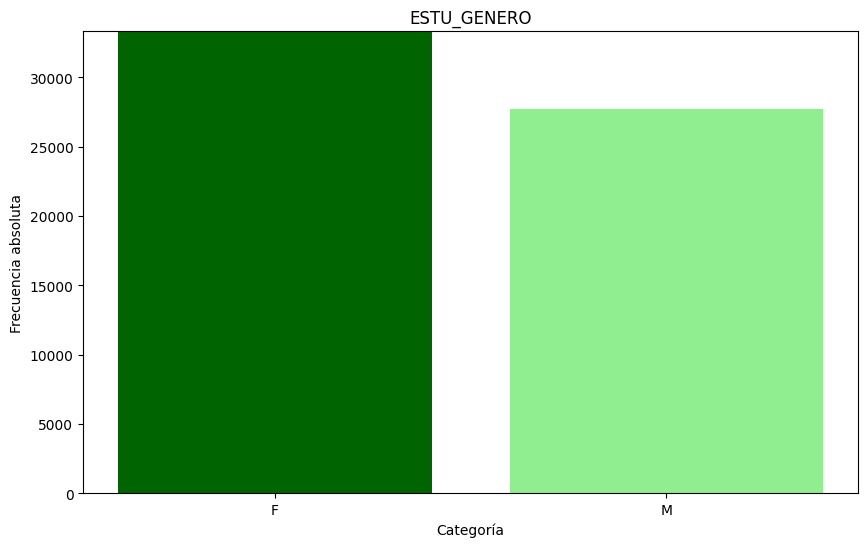

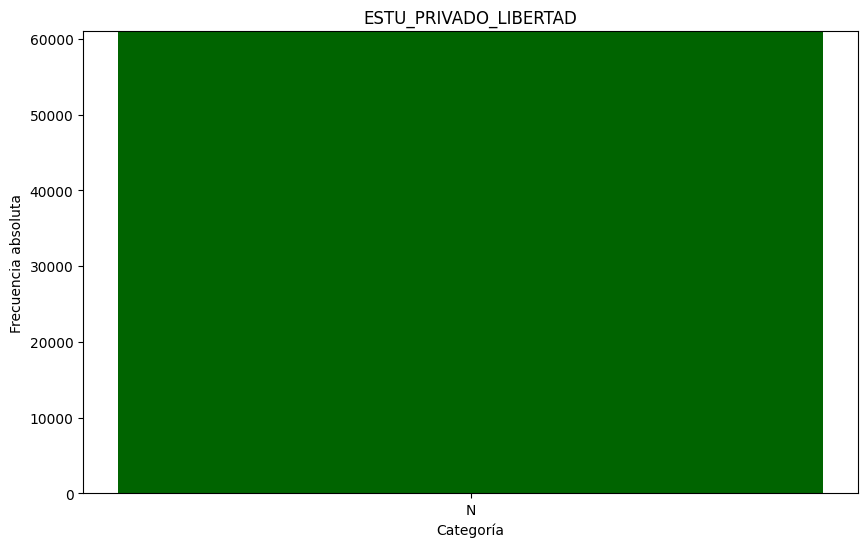

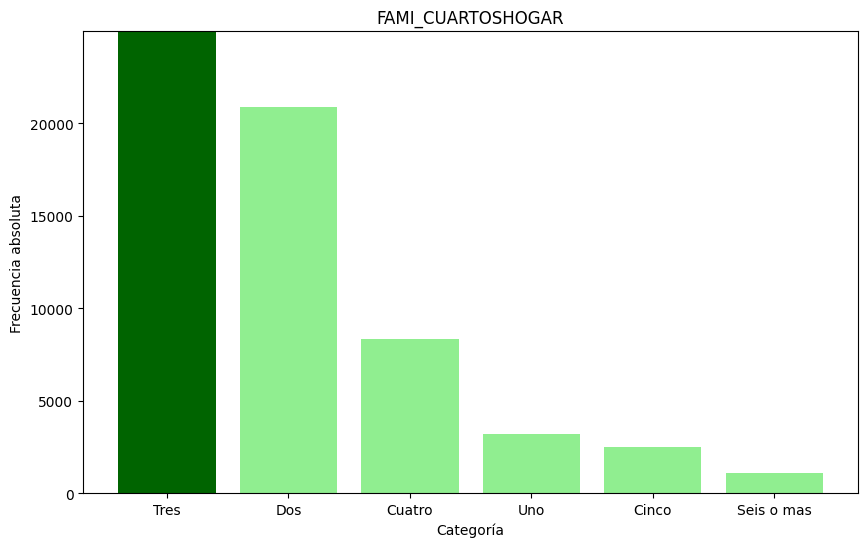

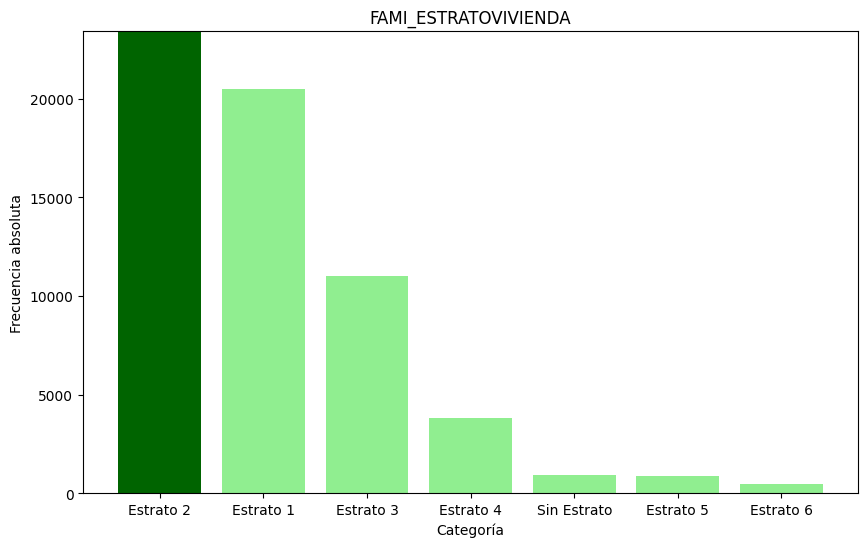

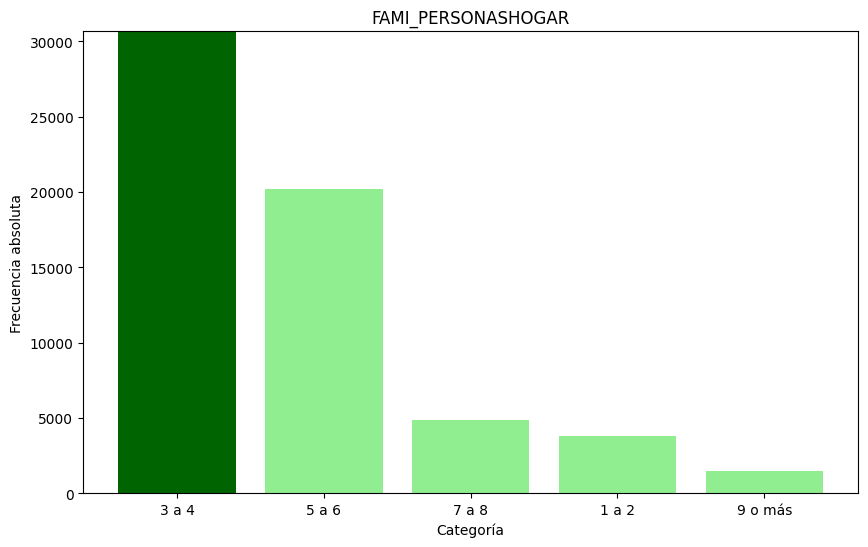

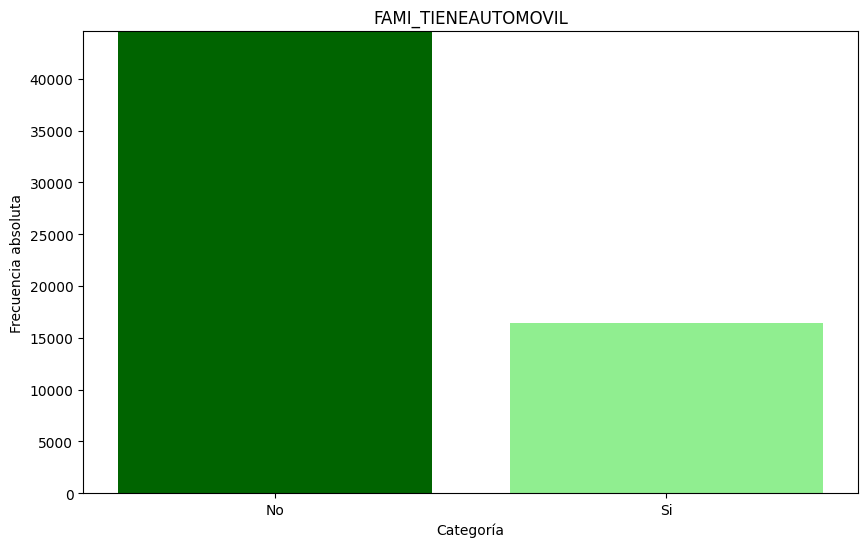

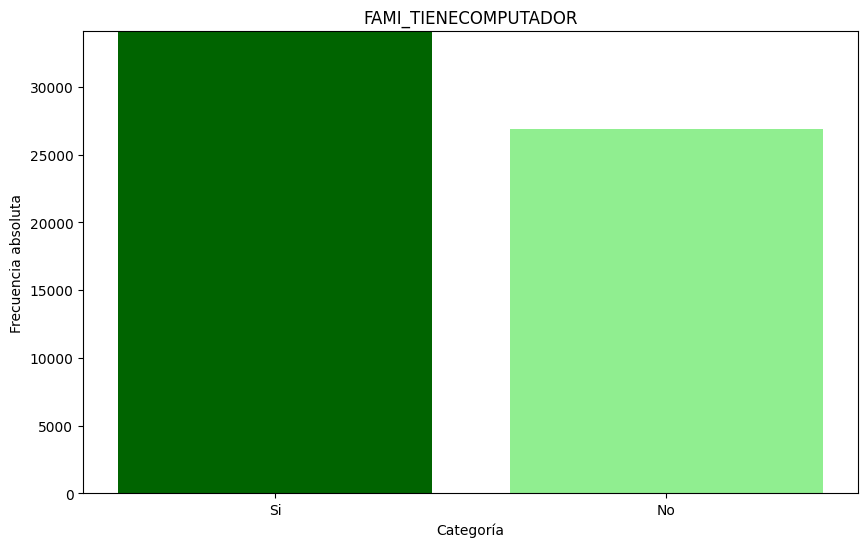

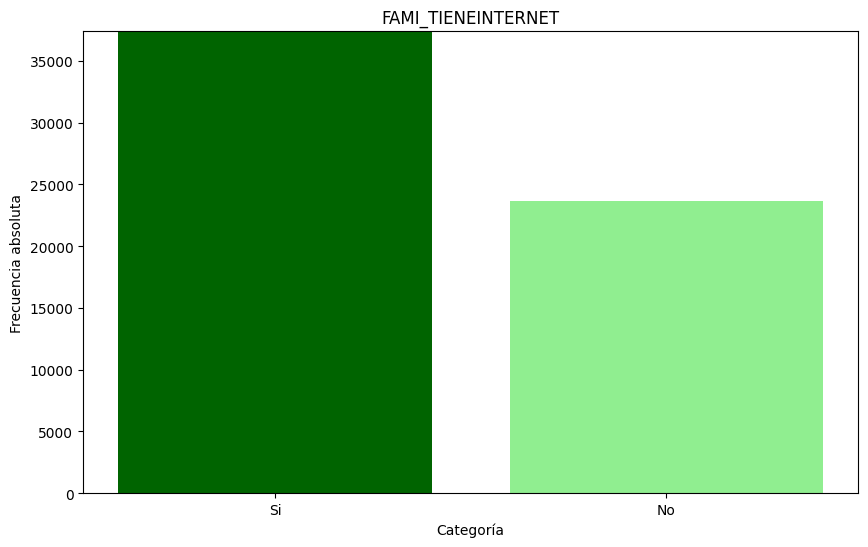

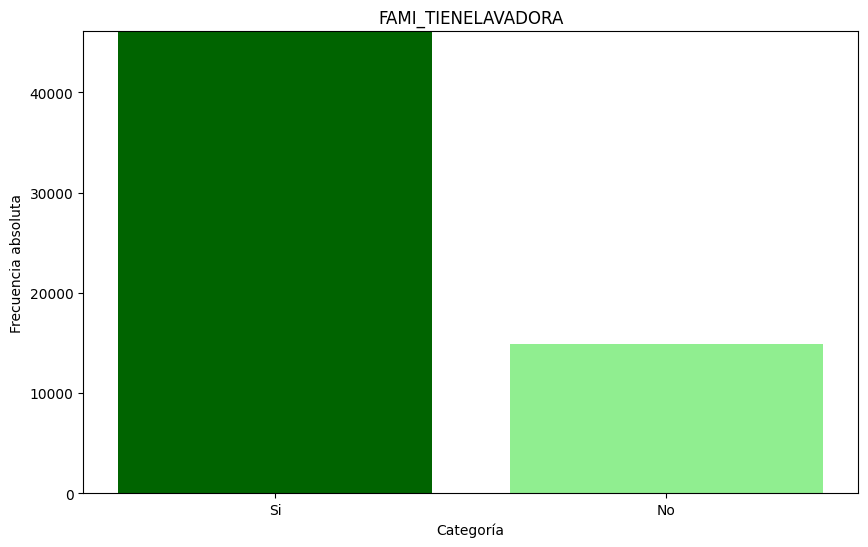

In [85]:
Var_Int=[ 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO',
       'COLE_CARACTER', 'COLE_DEPTO_UBICACION', 'COLE_GENERO', 'COLE_JORNADA', 'COLE_NATURALEZA', 'ESTU_GENERO',
       'ESTU_PRIVADO_LIBERTAD', 'FAMI_CUARTOSHOGAR', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET',
       'FAMI_TIENELAVADORA']
for i in Var_Int:
    # Gráfico de barras
    Nom_Colegios = data['COLE_NOMBRE_ESTABLECIMIENTO'].unique()
    años=data['PERIODO'].unique()
    datos_filtrados = data[(data['PERIODO'] == 20192) | (data['PERIODO'] == 20201)]

    tabla_frecuencias = datos_filtrados[i].value_counts()
    categorias = tabla_frecuencias.index.tolist()
    frecuencias_absolutas = tabla_frecuencias.values.tolist()
    colores = ["darkgreen","lightgreen" , "lightgreen", "lightgreen", "lightgreen", "lightgreen", "lightgreen", "lightgreen"]
    posiciones = range(len(categorias))


    # Crear la figura
    fig, ax = plt.subplots(figsize=(10, 6))

    # Crear las barras verticales
    barras = ax.bar(categorias, frecuencias_absolutas, color=colores)

    # Agregar etiquetas y título
    ax.set_xlabel("Categoría")
    ax.set_ylabel("Frecuencia absoluta")
    ax.set_title(i)

    # Rotar las etiquetas del eje x si es necesario
    # ax.set_xticklabels(categorias, rotation=45, ha="right")

    # Ajustar los límites del eje y
    ax.set_ylim(0, max(frecuencias_absolutas) + 10)

    # Mostrar la gráfica
    plt.show()

## Analisis de significancia

In [4]:
features=["PERIODO","COLE_AREA_UBICACION","COLE_BILINGUE","COLE_CALENDARIO","COLE_CARACTER","COLE_DEPTO_UBICACION","COLE_GENERO","COLE_JORNADA","COLE_MCPIO_UBICACION","COLE_NATURALEZA","COLE_NOMBRE_ESTABLECIMIENTO","COLE_NOMBRE_SEDE","ESTU_GENERO","ESTU_PRIVADO_LIBERTAD","FAMI_CUARTOSHOGAR","FAMI_EDUCACIONMADRE","FAMI_EDUCACIONPADRE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_TIENEAUTOMOVIL","FAMI_TIENECOMPUTADOR","FAMI_TIENEINTERNET","FAMI_TIENELAVADORA","DESEMP_INGLES"]
X = data[features]
X = pd.get_dummies(X, columns=["COLE_AREA_UBICACION","COLE_BILINGUE","COLE_CALENDARIO","COLE_CARACTER","COLE_DEPTO_UBICACION","COLE_GENERO","COLE_JORNADA","COLE_MCPIO_UBICACION","COLE_NATURALEZA","COLE_NOMBRE_ESTABLECIMIENTO","COLE_NOMBRE_SEDE","ESTU_GENERO","ESTU_PRIVADO_LIBERTAD","FAMI_CUARTOSHOGAR","FAMI_EDUCACIONMADRE","FAMI_EDUCACIONPADRE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_TIENEAUTOMOVIL","FAMI_TIENECOMPUTADOR","FAMI_TIENEINTERNET","FAMI_TIENELAVADORA","DESEMP_INGLES"], dtype=int, drop_first=True)

Y=data["PUNT_GLOBAL"]
X.head()

,PERIODO,COLE_AREA_UBICACION_URBANO,COLE_BILINGUE_S,COLE_CALENDARIO_B,COLE_CARACTER_NO APLICA,COLE_CARACTER_TÉCNICO,COLE_CARACTER_TÉCNICO/ACADÉMICO,COLE_DEPTO_UBICACION_SANTANDER,COLE_GENERO_MASCULINO,COLE_GENERO_MIXTO,...,FAMI_PERSONASHOGAR_7 a 8,FAMI_PERSONASHOGAR_9 o más,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENELAVADORA_Si,DESEMP_INGLES_A1,DESEMP_INGLES_A2,DESEMP_INGLES_B+,DESEMP_INGLES_B1
0,20192,1,0,0,0,0,1,1,0,1,...,0,0,0,1,1,1,0,1,0,0
1,20192,1,0,0,0,0,1,1,0,1,...,0,0,0,1,1,1,0,1,0,0
2,20192,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0
3,20192,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0
4,20192,1,0,0,0,1,0,0,0,1,...,0,0,1,1,1,1,0,0,0,0


In [5]:
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)

# agregar constante explicitamente
X_train = sm.add_constant(X_train)

In [6]:
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        17:11:36   Log-Likelihood:            -4.5971e+05
No. Observations:               95388   AIC:                         9.212e+05
Df Residuals:                   94522   BIC:                         9.294e+05
Df Model:                         865                                         
Covariance Type:            nonrobust                                         
                                                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------